In [1]:
# We will implement Batch gradient descent and Stochasstic gradient descent


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../input/banglore-homeprices/homeprices_banglore.csv')

In [4]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [17]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.03):
    number_of_features = X.shape[1] #shape gives us rows and columns, so we will take the columns for features
    
    weights = np.ones(shape=(number_of_features)) #w1, w2
    bias=0
    total_samples = X.shape[0]   
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(weights, scaled_X.T) + bias #w1*area + w2*bedrooms + bias
        
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        weights = weights - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) #finding cost(mean square error)
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return weights, bias, cost, cost_list, epoch_list
    
    
weights, bias, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),1500)
weights, bias, cost

(array([0.74306008, 0.43167985]), -0.12004080671239573, 0.00350925620021407)

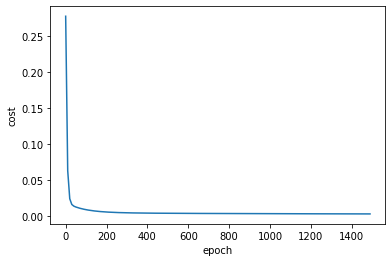

In [18]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [19]:
def predction(area, bedrooms, weights, bias):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = weights[0]*scaled_X[0] + weights[1] * scaled_X[1] + bias
    return sy.inverse_transform([[scaled_price]])[0][0]
     
    
predction(2600,4,weights, bias)

121.76538583878742

In [20]:
predction(1500,3,weights, bias)

69.14639028486086

**Stochastic Gradient Descent**

In [30]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.03):
    number_of_features = X.shape[1] #shape gives us rows and columns, so we will take the columns for features
    
    weights = np.ones(shape=(number_of_features)) #w1, w2
    bias=0
    total_samples = X.shape[0]   
    sgd_epoch_list = []
    sgd_epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(weights, sample_x.T) + bias #w1*area + w2*bedrooms + bias
        
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        weights = weights - learning_rate * w_grad
        bias = bias - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted)) #finding cost(mean square error)
        
        if i%100 == 0:
            sgd_epoch_list.append(cost)
            sgd_epoch_list.append(i)
            
    return weights, bias, cost, cost_list, epoch_list
    
    
sgd_weights, sgd_bias, sgd_cost, sgd_epoch_list, sgd_epoch_list = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10000)
sgd_weights, sgd_bias, sgd_cost

(array([0.65879495, 0.56226425]), -0.1508814051523434, 0.0050147821606339495)

In [31]:
predction(1500,3,sgd_weights, sgd_bias)

71.0514754901496

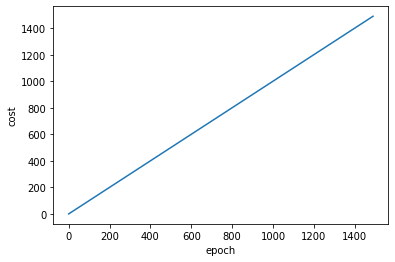

In [32]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(sgd_epoch_list, sgd_epoch_list)

**Mini Batch Gradient descent**